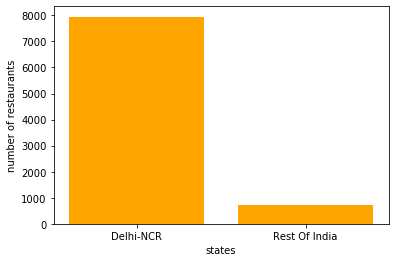

Delhi-NCR =  7947 Rest Of India =  705


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')

# cities in delhi-ncr
cities = ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'] 

#country code of india is 1, so no.of rows with country code 1 => total restaurants in India
total = df['Country Code'].value_counts()[1]

#for counting no.of cities in delhi-ncr
c = 0

#count no.of rows with cities in delhi-ncr => no.of restuarants in delhi-ncr
for i in df['City']:
    if i.strip() in cities:
        c += 1
        
x = ['Delhi-NCR','Rest Of India']
y = [c,total-c]

plt.xlabel('states')
plt.ylabel('number of restaurants')
plt.bar(x,y,color = 'orange')
plt.show()
print("Delhi-NCR = ",c,"Rest Of India = ",total-c)

In [4]:
india_df = df[df['Country Code'] == 1] # we need only indian cities so country code of india is 1

ncr_cuisines = set() #set of cuisines of ncr cities
rest_of_india_cuisines = set() #set of cuisines of not ncr indian cities

## adding unique cuisines to respective sets
for i in india_df.index:
    cuisines = india_df['Cuisines'].loc[i].split(',')# to get all separate cuisines
    is_ncr_city = india_df['City'].loc[i] in cities #whether to add to ncr or rest of india
    for j in cuisines:
        if (is_ncr_city) :
            ncr_cuisines.add(j.strip())
        else:
            rest_of_india_cuisines.add(j.strip())

not_in_ncr_accr_to_dataset = (rest_of_india_cuisines) - (ncr_cuisines)
print(not_in_ncr_accr_to_dataset)

# checking whether the data in csv file is correct or not
import requests as rq
user_key = "8b0da456b5f2c9fdb933e7d1b990e536"
basic_api = "https://developers.zomato.com/api/v2.1"

h = {"Accept": "application/json", "user-key" : user_key}
p = {"city_id" : 1}
res = rq.get(basic_api + "/cuisines", params = p, headers = h)
data = res.json()

cuisines_from_api_in_delhi = set({})

for i in data['cuisines']:
    cuisines_from_api_in_delhi.add(i['cuisine']['cuisine_name'])
#i have created a set of all the uniques cuisines which i found from the zomato api.
# now we have two things ---->   1. cuisines_from_api_in_delhi          2. not_in_ncr_accr_to_dataset

#now i have printed all those cuisines which are actually in delhi ncr but not mentioned in the dataset.
for i in not_in_ncr_accr_to_dataset:
    if i in cuisines_from_api_in_delhi:
        print(i)
#following is the list of those cuisines which are not in delhi_ncr according to the dataset. but these are actually available
#in delhi-ncr according to zomato api. it seems like it is just due to incomplete dataset.

{'German', 'Cajun', 'Malwani', 'BBQ'}
Malwani
BBQ


In [5]:
ncr_cuisine_dict = {} #dictionary for cuisines and respective counts w.r.t ncr restaurants
rest_of_india_cuisine_dict = {} #dictionary for cuisines and respective counts w.r.t non ncr restaurants which are in india

for i in india_df.index:
    cuisines = india_df['Cuisines'].loc[i].split(',') # to get all separate cuisines
    is_ncr_city = india_df['City'].loc[i] in cities  #whether to add to ncr or rest of india
    for j in cuisines:
        if (is_ncr_city) :
            if j.strip() in ncr_cuisine_dict : ncr_cuisine_dict[j.strip()] += 1
            else : ncr_cuisine_dict[j.strip()] = 1
        else:
            if j.strip() in rest_of_india_cuisine_dict : rest_of_india_cuisine_dict[j.strip()] += 1
            else : rest_of_india_cuisine_dict[j.strip()] = 1
        
#now we have got the required data and we have to print top 10
import numpy as np

# sort ncr cuisines and print top 10
ncr_keys = np.array(list(ncr_cuisine_dict.keys()))
ncr_values = np.array(list(ncr_cuisine_dict.values()))

index = np.argsort(ncr_values)
ncr_keys = ncr_keys[index][::-1]
ncr_values = ncr_values[index][::-1]

print("\n*** Delhi - NCR ***\n")
for i in range(0,10):
    print(ncr_keys[i],":",ncr_values[i])


#sort rest of inida cuisines and print top 10
rest_of_india_keys = np.array(list(rest_of_india_cuisine_dict.keys()))
rest_of_india_values = np.array(list(rest_of_india_cuisine_dict.values()))

index = np.argsort(rest_of_india_values)
rest_of_india_keys = rest_of_india_keys[index][::-1]
rest_of_india_values = rest_of_india_values[index][::-1]

print("\n*** Rest Of India ***\n")
for i in range(0,10):
    print(rest_of_india_keys[i],":",rest_of_india_values[i])



*** Delhi - NCR ***

North Indian : 3597
Chinese : 2448
Fast Food : 1866
Mughlai : 933
Bakery : 697
South Indian : 569
Continental : 547
Desserts : 542
Street Food : 538
Italian : 535

*** Rest Of India ***

North Indian : 349
Chinese : 242
Continental : 177
Italian : 147
Cafe : 136
Fast Food : 97
South Indian : 62
Mughlai : 59
Desserts : 55
Mexican : 50
